# 📊 Tesla Stock Price Analysis & Future Prediction

This notebook analyzes Tesla Inc. (TSLA) stock performance over the past few months and uses financial metrics and basic machine learning to explore the question:

> **Should I invest in Tesla based on recent price trends?**

We will:
- Visualize Tesla’s historical price data
- Extract key financial insights
- Predict future price trends using a simple regression model
- Offer data-driven insights tailored for investment evaluation


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Improve visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('../data/Tesla-YTD.csv')  # Fixed path to data
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

# Display top 10 records
print("Top 10 Trading Days:")
print(df.head(10))

Top 10 Trading Days:
        Date    Open    High     Low   Close       Volume
0 2025-05-02  284.90  294.78  279.81  287.21  114454703.0
1 2025-05-01  280.01  290.87  279.81  280.52   99658969.0
2 2025-04-30  279.90  284.45  270.78  282.16  128961102.0
3 2025-04-29  285.50  293.32  279.47  292.03  108906602.0
4 2025-04-28  288.98  294.86  272.42  285.88  151731812.0
5 2025-04-25  261.69  286.85  259.63  284.95  167560703.0
6 2025-04-24  250.50  259.54  249.20  259.51   94464203.0
7 2025-04-23  254.86  259.45  244.43  250.74  150381906.0
8 2025-04-22  230.96  242.79  229.85  237.97  120858492.0
9 2025-04-21  230.26  232.21  222.79  227.50   97768008.0


In [17]:
## Basic Financial Metrics

In [18]:
# Calculate key financial metrics
metrics = {
    'Average Daily Return': df['Close'].pct_change().mean() * 100,
    'Volatility (Std Dev)': df['Close'].pct_change().std() * 100,
    'Highest Price': df['High'].max(),
    'Lowest Price': df['Low'].min(),
    'Average Volume': df['Volume'].mean(),
    'Price Range': df['High'].max() - df['Low'].min(),
    'Average Daily Range': (df['High'] - df['Low']).mean()
}

print("Key Financial Metrics:")
for metric, value in metrics.items():
    if 'Price' in metric or 'Range' in metric:
        print(f"{metric}: ${value:.2f}")
    elif 'Volume' in metric:
        # Convert Volume column to numeric, removing commas
        value = df['Volume'].mean()
        print(f"{metric}: {value:,.0f} shares") 
    else:
        print(f"{metric}: {value:.2f}%")

Key Financial Metrics:
Average Daily Return: 0.47%
Volatility (Std Dev): 5.11%
Highest Price: $439.74
Lowest Price: $214.25
Average Volume: 108,273,833 shares
Price Range: $225.49
Average Daily Range: $18.42


## Technical Analysis

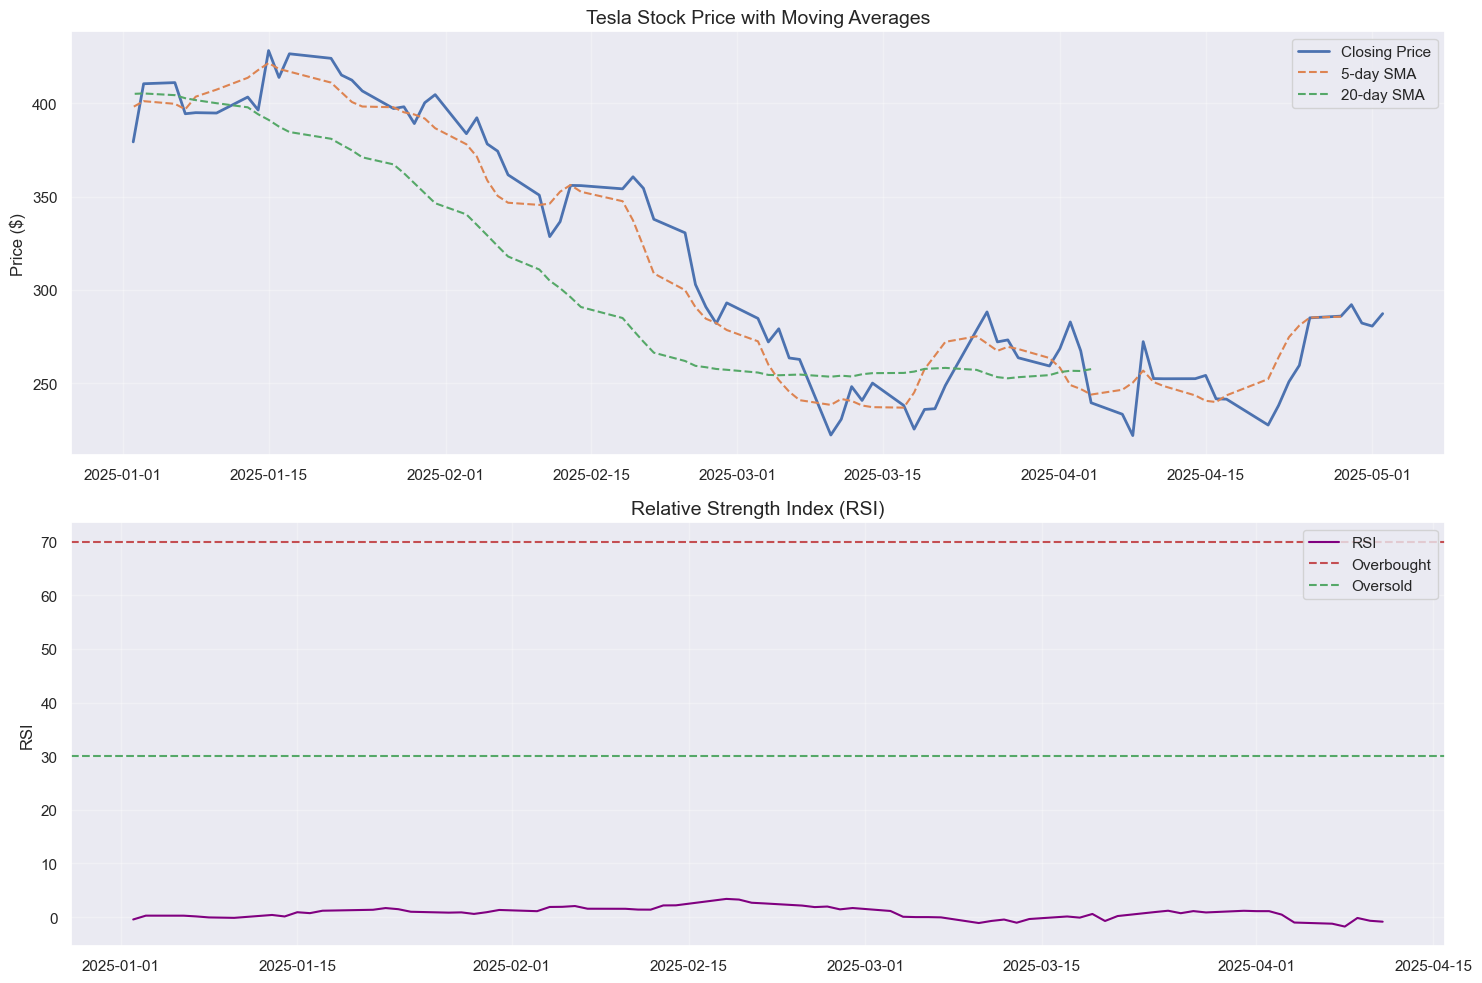

In [19]:
# Calculate technical indicators
df['Daily_Return'] = df['Close'].pct_change()
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))

# Plot technical indicators
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Price and Moving Averages
ax1.plot(df['Date'], df['Close'], label='Closing Price', linewidth=2)
ax1.plot(df['Date'], df['SMA_5'], label='5-day SMA', linestyle='--')
ax1.plot(df['Date'], df['SMA_20'], label='20-day SMA', linestyle='--')
ax1.set_title('Tesla Stock Price with Moving Averages', fontsize=14)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# RSI
ax2.plot(df['Date'], df['RSI'], label='RSI', color='purple')
ax2.axhline(y=70, color='r', linestyle='--', label='Overbought')
ax2.axhline(y=30, color='g', linestyle='--', label='Oversold')
ax2.set_title('Relative Strength Index (RSI)', fontsize=14)
ax2.set_ylabel('RSI', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Volume Analysis

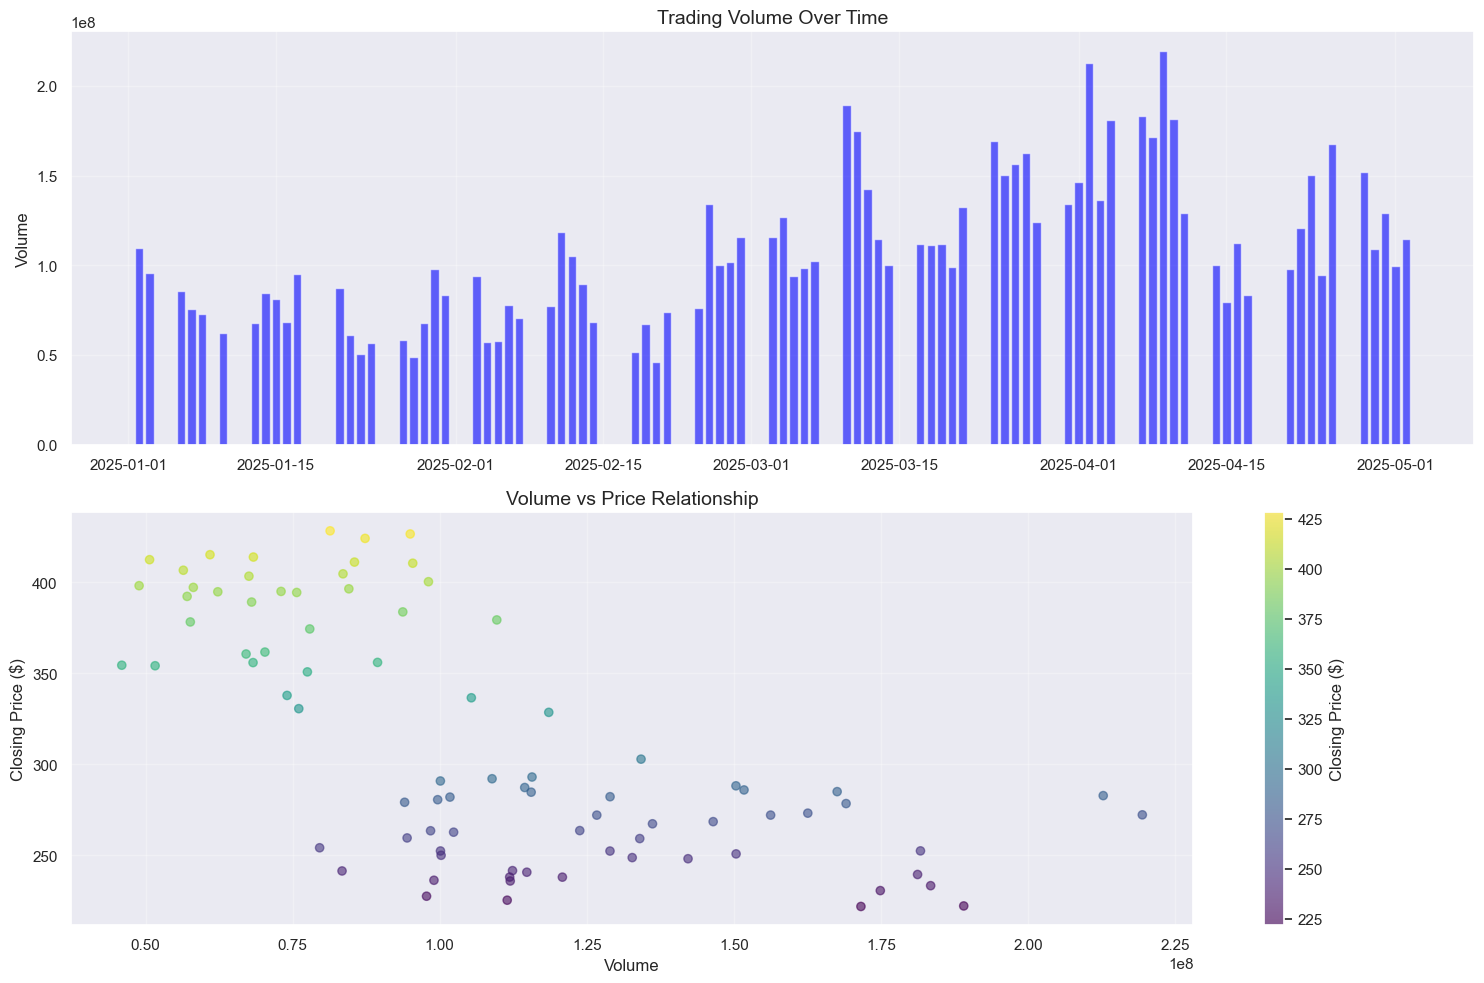

In [20]:
# Volume analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Volume over time
ax1.bar(df['Date'], df['Volume'], color='blue', alpha=0.6)
ax1.set_title('Trading Volume Over Time', fontsize=14)
ax1.set_ylabel('Volume', fontsize=12)
ax1.grid(True, alpha=0.3)

# Volume vs Price
scatter = ax2.scatter(df['Volume'], df['Close'], c=df['Close'], cmap='viridis', alpha=0.6)
ax2.set_title('Volume vs Price Relationship', fontsize=14)
ax2.set_xlabel('Volume', fontsize=12)
ax2.set_ylabel('Closing Price ($)', fontsize=12)
plt.colorbar(scatter, ax=ax2, label='Closing Price ($)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Price Prediction Model

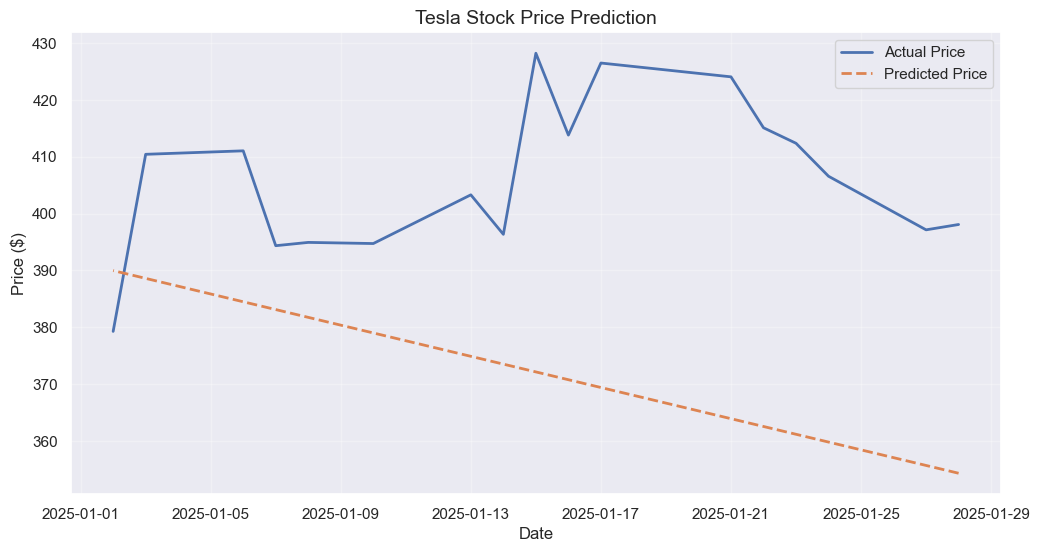


Model Performance:
Mean Squared Error: 1544.18
R-squared Score: -8.34
Predicted daily price change: $-1.37

Next 5 Days Predictions:
Day 1: $224.04
Day 2: $222.67
Day 3: $221.30
Day 4: $219.93
Day 5: $218.56


g:\Project\Tesla-Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
X = df[['Days']]
y = df['Close']

# Split data
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][train_size:], y_test, label='Actual Price', linewidth=2)
plt.plot(df['Date'][train_size:], y_pred, label='Predicted Price', linestyle='--', linewidth=2)
plt.title('Tesla Stock Price Prediction', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Predicted daily price change: ${model.coef_[0]:.2f}")

# Predict next 5 days
last_day = df['Days'].max()
future_days = np.array(range(last_day + 1, last_day + 6)).reshape(-1, 1)
future_predictions = model.predict(future_days)

print("\nNext 5 Days Predictions:")
for i, pred in enumerate(future_predictions, 1):
    print(f"Day {i}: ${pred:.2f}")

## 6. Risk Analysis

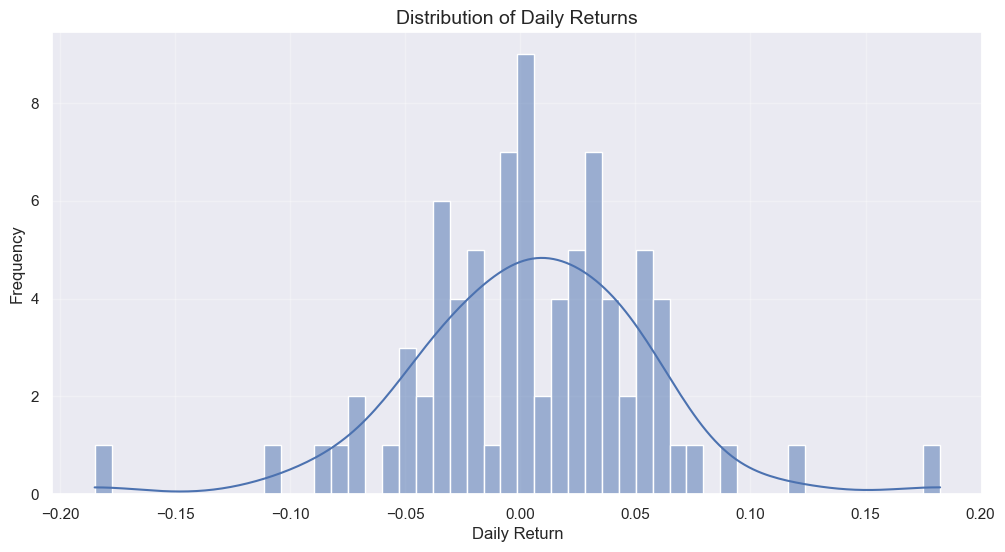


Risk Metrics:
Annualized Volatility: 81.18%
Sharpe Ratio: 1.46
Maximum Daily Loss: -18.49%
Maximum Daily Gain: 18.24%


In [22]:
# Calculate risk metrics
daily_returns = df['Close'].pct_change()
volatility = daily_returns.std() * np.sqrt(252)  # Annualized volatility
sharpe_ratio = (daily_returns.mean() * 252) / volatility  # Assuming risk-free rate of 0

# Plot daily returns distribution
plt.figure(figsize=(12, 6))
sns.histplot(daily_returns.dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns', fontsize=14)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nRisk Metrics:")
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Daily Loss: {daily_returns.min():.2%}")
print(f"Maximum Daily Gain: {daily_returns.max():.2%}")

## 7. Trading Strategy Analysis

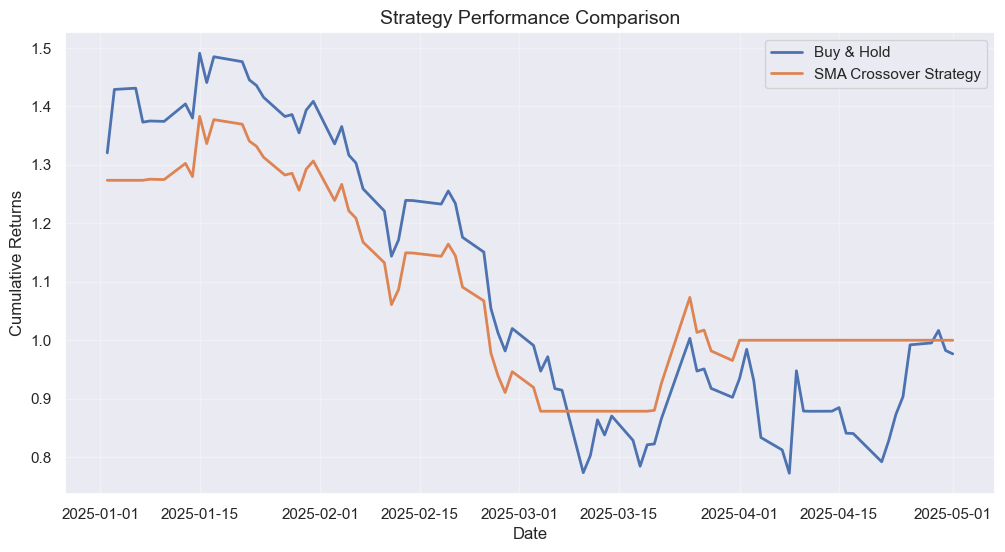


Strategy Performance:
Buy & Hold Return: 32.06%
SMA Crossover Return: 27.36%


In [23]:
# Simple moving average crossover strategy
df['Signal'] = np.where(df['SMA_5'] > df['SMA_20'], 1, 0)
df['Strategy_Returns'] = df['Signal'].shift(1) * df['Daily_Return']

# Calculate cumulative returns
df['Cumulative_Returns'] = (1 + df['Daily_Return']).cumprod()
df['Strategy_Cumulative_Returns'] = (1 + df['Strategy_Returns']).cumprod()

# Plot strategy performance
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Buy & Hold', linewidth=2)
plt.plot(df['Date'], df['Strategy_Cumulative_Returns'], label='SMA Crossover Strategy', linewidth=2)
plt.title('Strategy Performance Comparison', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nStrategy Performance:")
print(f"Buy & Hold Return: {(df['Cumulative_Returns'].iloc[-1] - 1) * 100:.2f}%")
print(f"SMA Crossover Return: {(df['Strategy_Cumulative_Returns'].iloc[-1] - 1) * 100:.2f}%") 